<a href="https://colab.research.google.com/github/quimHM/QHM_TFG_repository/blob/main/TFG_devel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Credit Card Approvals
> A Summary of project "Predicting Credit Card Approvals", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: images/credit_card.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [ ]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('/content/drive/MyDrive/TFG/crx.data', header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [ ]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
print(cc_apps.tail(74))

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [ ]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.nan)

# Inspect the missing values again
print(cc_apps.tail(17))

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  00140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  00240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  00400    0  -
685  b  21.08  10.085  y  p   e   h  1

## 4. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [ ]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
cc_apps.isnull().values.sum()

67

## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>

In [ ]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
cc_apps.isnull().values.sum()

0

## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

## 8. Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8377192982456141
[[92 11]
 [26 99]]


## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))
print(grid_model_result.classes_)

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
[0. 1.]


In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import KMeans, MiniBatchKMeans
from matplotlib import pyplot as plt

In [ ]:
inputX = rescaledX_test
inputY = y_test

#inputX = rescaledX_train
#inputY = y_train

#inputX = rescaledX
#inputY = y

Text(0, 0.5, 'Inertia')

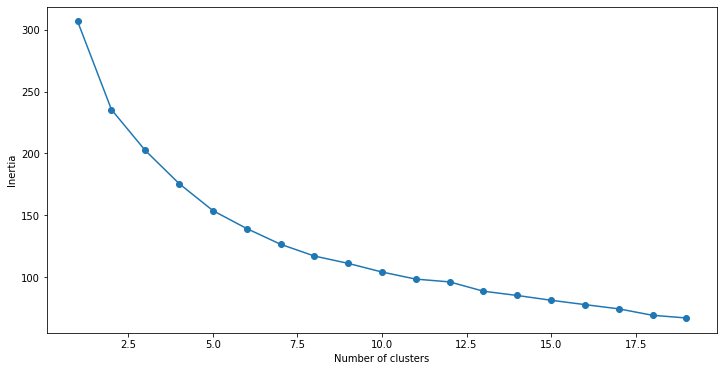

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    #kmeans = MiniBatchKMeans(k)
    kmeans.fit(inputX)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

228


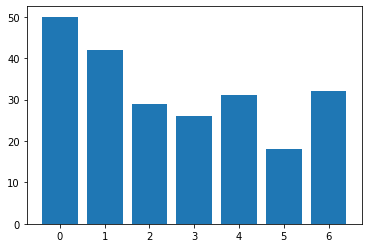

In [ ]:
k=7 #is the selected number of clusters as is roughly where the decrease gets constant
#kmeans = KMeans(n_jobs = -1, n_clusters = k, init='k-means++')
kmeansAlg = MiniBatchKMeans(k)
kmeansAlg.fit(inputX)

def provideKlusteredX(kmeans,Xtok, Ytok):
  labels = kmeans.predict(Xtok)
  nk = kmeans.n_clusters
  labelslist = labels.tolist()
  print(len(labelslist))
  sum=0
  occurences=[0]*nk
  clustered_X=[]
  clustered_Y=[]

  for i in range(nk):
    clustered_X.append([])
    clustered_Y.append([])

  for i in range(len(labelslist)):
    clustered_X[labelslist[i]].append(Xtok[i])
    clustered_Y[labelslist[i]].append(Ytok[i])

  for i in range(nk):
    occurences[i]=labelslist.count(i)
    #print(len(clustered_testX[i]))
    #print(labelslist.count(i))
    sum+=labelslist.count(i)
  #print(sum)

  #SHOW INSTANCES OF EACH TYPE IN TEST DATA
  import matplotlib.pyplot as plt
  plt.bar(range(nk),occurences)

  return clustered_X,clustered_Y

clustered_testX,clustered_testY = provideKlusteredX(kmeansAlg, inputX, inputY)

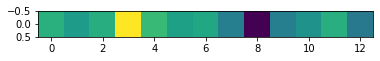

     0     1     2     3     4     5     6     7     8     9     10    11   12
0  0.01 -0.43 -0.04  1.94  0.24 -0.34 -0.18 -1.04 -3.31 -1.04 -0.63 -0.01 -1.2


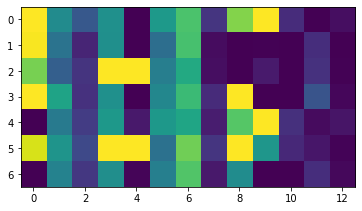

     0     1     2     3     4     5     6     7     8     9     10    11    12
0  1.00  0.48  0.28  0.50  0.00  0.54  0.72  0.15  0.81  1.00  0.13  0.00  0.04
1  0.99  0.38  0.11  0.50  0.00  0.36  0.71  0.03  0.00  0.00  0.00  0.13  0.00
2  0.79  0.30  0.15  1.00  1.00  0.43  0.61  0.04  0.00  0.07  0.00  0.14  0.00
3  1.00  0.58  0.14  0.50  0.00  0.46  0.68  0.12  1.00  0.00  0.00  0.26  0.02
4  0.00  0.41  0.18  0.53  0.07  0.53  0.59  0.08  0.73  1.00  0.14  0.03  0.05
5  0.94  0.52  0.22  1.00  1.00  0.37  0.78  0.15  1.00  0.52  0.11  0.06  0.01
6  0.00  0.44  0.16  0.49  0.01  0.43  0.73  0.07  0.49  0.00  0.00  0.13  0.02


In [ ]:
logregAlg = LogisticRegression(max_iter=100, tol=0.01)
# Fit logreg to the train set
logregAlg.fit(rescaledX_train, y_train)

#SHOW COEFFICIENTS
plt.imshow(logregAlg.coef_, interpolation='nearest')
plt.show()
print(pd.DataFrame(logregAlg.coef_).round(2))

#SHOW CLUSTER CENTERS (NOT NECESSARILY REAL DATA)
plt.imshow(kmeansAlg.cluster_centers_, interpolation='nearest')
plt.show()
print(pd.DataFrame(kmeansAlg.cluster_centers_).round(2))

In [ ]:
def StatsOnKlusteredTest(totalX, clusteredX, clusteredY):
  TOTALyes = 0
  for i in range(len(clusteredY)):
    #print(clusteredY[i]) 
    TOTALyes += clusteredY[i].count(1)
    #print(TOTALyes)
  TOTALno = len(totalX)-TOTALyes
  presencerate = [] #instances of this type/total instances
  approvalrate = [] #approval rate for this type
  approvalcontributionrate = [] #approval for this type over the total n of approvals in totalX
  for i in range(len(clusteredY)):
    yes = clusteredY[i].count(1)
    no = clusteredY[i].count(0)
    totalyesno = len(clusteredY[i])
    #print("Approved:",yes,"// Denied: ",no)
    presencerate.append(100*totalyesno/len(totalX))
    approvalrate.append(100*yes/totalyesno)
    approvalcontributionrate.append(100*yes/TOTALyes)
    print("Instance proportion:",presencerate[i],"// Approval rate:",approvalrate[i])
    print()
  return presencerate,approvalrate,approvalcontributionrate

presencerateTEST,approvalrateTEST,approvalcontributionrateTEST = StatsOnKlusteredTest(inputX,clustered_testX,clustered_testY)

Instance proportion: 21.92982456140351 // Approval rate: 22.0

Instance proportion: 18.42105263157895 // Approval rate: 88.0952380952381

Instance proportion: 12.719298245614034 // Approval rate: 93.10344827586206

Instance proportion: 11.403508771929825 // Approval rate: 42.30769230769231

Instance proportion: 13.596491228070175 // Approval rate: 29.032258064516128

Instance proportion: 7.894736842105263 // Approval rate: 44.44444444444444

Instance proportion: 14.035087719298245 // Approval rate: 68.75



In [ ]:
def StatsOnKlusteredTestLogRegResults(logreg, totalX, clusteredX, clusteredY):
  y_pred = logreg.predict(totalX)
  TOTALyes = np.count_nonzero(y_pred == 1)
  TOTALno = np.count_nonzero(y_pred == 0)
  #COMPUTE ACCURACY OF THE MODEL FOR DIFFERENT CLUSTERS AND APPROVAL RATES
  presencerate = [] #instances of this type/total test instances
  approvalrate = [] #approval rate for this type
  approvalcontributionrate = [] #approval for this type over the total n of approvals in totalX
  accuracy = [] #logreg model accuracy per kluster
  for i in range(len(clusteredX)):
    y_pred = logreg.predict(clusteredX[i])
    
    print("Accuracy of logistic regression classifier: ", logreg.score(clusteredX[i], clusteredY[i]))
    accuracy.append(100*logreg.score(clusteredX[i], clusteredY[i]))
    yes = np.count_nonzero(y_pred == 1)
    no = np.count_nonzero(y_pred == 0)
    totalyesno = len(y_pred)
    presencerate.append(100*totalyesno/len(totalX))
    approvalrate.append(100*yes/totalyesno)
    approvalcontributionrate.append(100*yes/TOTALyes)
    print("Instance proportion:",presencerate[i],"// Approval rate:",approvalrate[i])
    print()
  return presencerate,approvalrate,approvalcontributionrate, accuracy

presencerateTESTpred,approvalrateTESTpred,approvalcontributionrateTESTpred, accuracyperK = StatsOnKlusteredTestLogRegResults(logregAlg,inputX,clustered_testX,clustered_testY)

Accuracy of logistic regression classifier:  0.96
Instance proportion: 21.92982456140351 // Approval rate: 18.0

Accuracy of logistic regression classifier:  0.8809523809523809
Instance proportion: 18.42105263157895 // Approval rate: 100.0

Accuracy of logistic regression classifier:  0.9310344827586207
Instance proportion: 12.719298245614034 // Approval rate: 100.0

Accuracy of logistic regression classifier:  0.5769230769230769
Instance proportion: 11.403508771929825 // Approval rate: 0.0

Accuracy of logistic regression classifier:  0.967741935483871
Instance proportion: 13.596491228070175 // Approval rate: 25.806451612903224

Accuracy of logistic regression classifier:  0.5
Instance proportion: 7.894736842105263 // Approval rate: 27.77777777777778

Accuracy of logistic regression classifier:  0.78125
Instance proportion: 14.035087719298245 // Approval rate: 53.125



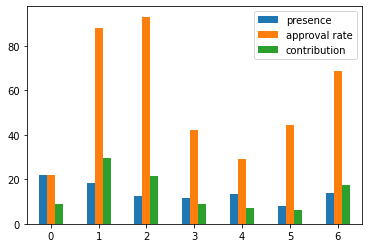

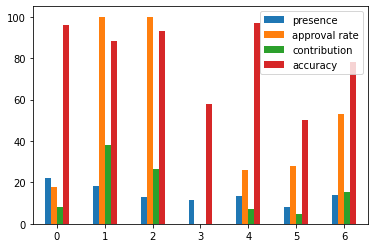

In [ ]:
df = pd.DataFrame({'presence': presencerateTEST,
                   'approval rate': approvalrateTEST,
                   'contribution': approvalcontributionrateTEST}, index=range(k))
ax = df.plot.bar(rot=0)
df = pd.DataFrame({'presence': presencerateTESTpred,
                   'approval rate': approvalrateTESTpred,
                   'contribution': approvalcontributionrateTESTpred,
                   'accuracy': accuracyperK}, index=range(k))
ax = df.plot.bar(rot=0)

In [ ]:
import random
#characterize agent according to a cluster center (person archetype) and some given noise added to it
def simulateperson_Kcenter(kmeans,k=0,nc=0.5):
  archetype = kmeans.cluster_centers_[k]
  noisecoefficient = nc
  noise = np.random.random_sample(13,)-0.5*noisecoefficient
  output = np.clip(np.add(archetype,noise),0,1)
  return output

In [ ]:
def simulateXpeople(kmeans,x,nc=0.5):
  simulatedX = []
  simulatedN = x
  for i in range(kmeans.n_clusters):
    for j in range(simulatedN):
      simulatedX.append(simulateperson_Kcenter(kmeans,i,nc))
  #print(np.array(simulatedX)[0])
  return np.array(simulatedX)

YES: 0 // NO, 5


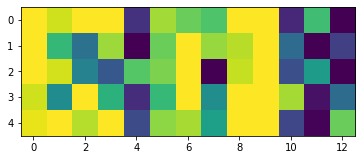

,0,1,2,3,4,5,6,7,8,9,10,11,12,LABEL
0,1.0,0.93,1.0,1.0,0.15,0.86,0.77,0.72,1.0,1.0,0.12,0.69,0.0,0.0
1,1.0,0.67,0.37,0.85,0.0,0.78,1.0,0.85,0.89,1.0,0.35,0.0,0.19,0.0
2,1.0,0.93,0.44,0.27,0.74,0.8,1.0,0.0,0.91,1.0,0.24,0.55,0.0,0.0
3,0.93,0.49,1.0,0.64,0.13,0.67,1.0,0.49,1.0,1.0,0.86,0.05,0.35,0.0
4,0.97,1.0,0.89,1.0,0.23,0.83,0.87,0.56,1.0,1.0,0.21,0.01,0.77,0.0


In [ ]:
#SIMULATE 5 PEOPLE AND SHOWCASE SLIGHT VARIATION AMONG THEM
simulatedList = []
simulatedN = 5
for i in range(simulatedN):
  simulatedList.append(simulateperson_Kcenter(kmeansAlg))
simulatedX = np.array(simulatedList)
y_pred = logreg.predict(simulatedX)
yes = np.count_nonzero(y_pred == 1)
no = np.count_nonzero(y_pred == 0)
print("YES:",yes,"// NO,",no)
plt.imshow(simulatedX, interpolation='nearest')
plt.show()

#SHOW IN TABLE + PREDICTED LABEL
auxDF = pd.DataFrame(simulatedX).round(2)
auxDF['LABEL'] = y_pred
slice_ = ['LABEL']

def highlight_label(s, props=''):
    return np.where(s == 0, 'color:red; background-color: #ffffb3;', 'color:green; background-color: #94C973;')
auxDF.style.format("{:.2}").apply(highlight_label, props='', axis=0, subset=slice_)


YES: 0 // NO, 100


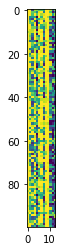

In [ ]:
#SIMULATE 100 PEOPLE of one type
simulatedList = []
simulatedN = 100
for i in range(simulatedN):
  simulatedList.append(simulateperson_Kcenter(kmeansAlg,0,0.3))
simulatedX = np.array(simulatedList)
y_pred = logreg.predict(simulatedX)
yes = np.count_nonzero(y_pred == 1)
no = np.count_nonzero(y_pred == 0)
print("YES:",yes,"// NO,",no)
plt.imshow(simulatedX, interpolation='nearest')
plt.show()

350
Instance proportion: 23.142857142857142 // Approval rate: 2.4691358024691357

Instance proportion: 7.142857142857143 // Approval rate: 96.0

Instance proportion: 12.285714285714286 // Approval rate: 100.0

Instance proportion: 13.714285714285714 // Approval rate: 6.25

Instance proportion: 11.714285714285714 // Approval rate: 0.0

Instance proportion: 26.0 // Approval rate: 9.89010989010989

Instance proportion: 6.0 // Approval rate: 42.857142857142854



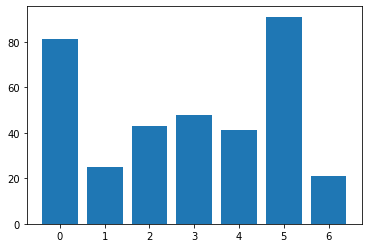

In [ ]:
#SIMULATE 100 PEOPLE of one type
simulatedX = simulateXpeople(kmeansAlg,50, 0.5)
y_pred = logregAlg.predict(simulatedX)
clusteredX, clusteredY = provideKlusteredX(kmeansAlg, simulatedX, y_pred)
presencerateSIM,approvalrateSIM,approvalcontributionrateSIM = StatsOnKlusteredTest(simulatedX, clusteredX, clusteredY)


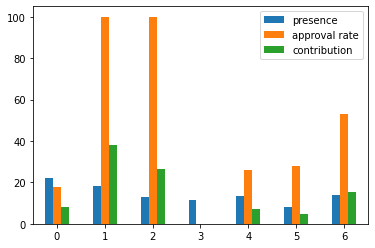

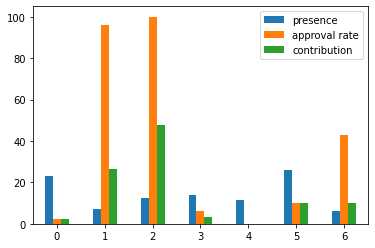

In [ ]:
df = pd.DataFrame({'presence': presencerateTESTpred,
                   'approval rate': approvalrateTESTpred,
                   'contribution': approvalcontributionrateTESTpred}, index=range(k))
ax = df.plot.bar(rot=0)
df = pd.DataFrame({'presence': presencerateSIM,
                   'approval rate': approvalrateSIM,
                   'contribution': approvalcontributionrateSIM}, index=range(k))
ax = df.plot.bar(rot=0)

462
TEST set - YES: 110 // NO, 118  = 48.24561403508772
iteration: 0 ( trainsize = 7462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 1 ( trainsize = 14462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 2 ( trainsize = 21462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 3 ( trainsize = 28462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 4 ( trainsize = 35462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 5 ( trainsize = 42462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 6 ( trainsize = 49462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 7 ( trainsize = 56462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 8 ( trainsize = 63462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 9 ( trainsize = 70462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 10 ( trainsize = 77462 ) - YES: 110 // NO, 118  = 48.24561403508772
iteration: 11 ( trainsize = 84462 ) - YES: 110 // NO, 118  = 48.24561403508772
iterati

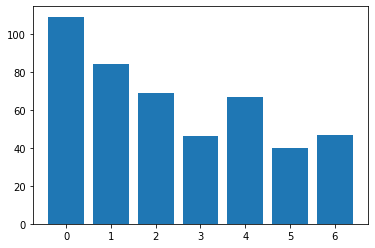

In [ ]:
simulatedX_train = rescaledX_train
simulatedY_train = y_train
clustered_SIM_X,clustered_SIM_Y = provideKlusteredX(kmeansAlg, rescaledX_train, y_train)

y_pred = logregAlg.predict(rescaledX_test)
yes = np.count_nonzero(y_pred == 1)
no = np.count_nonzero(y_pred == 0)
print("TEST set - YES:",yes,"// NO,",no," =",100*yes/len(rescaledX_test))

BatchLogreg = LogisticRegression()
#BatchLogreg = LogisticRegression(max_iter=100, tol=0.01)
for iter in range(20):
  BatchLogreg.fit(simulatedX_train, simulatedY_train)
  #print(BatchLogreg.coef_)
  simulatedBatch = simulateXpeople(kmeansAlg,1000)
  Sy_pred = BatchLogreg.predict(simulatedBatch)
  simulatedX_train = np.concatenate((simulatedX_train,simulatedBatch))
  simulatedY_train = np.concatenate((simulatedY_train,Sy_pred))
  #simulatedY_train = np.concatenate((simulatedY_train,[1]*len(Sy_pred)))

  Ty_pred = BatchLogreg.predict(rescaledX_test)
  yes = np.count_nonzero(Ty_pred == 1)
  no = np.count_nonzero(Ty_pred == 0)
  print("iteration:",iter,"( trainsize =",len(simulatedX_train),") - YES:",yes,"// NO,",no," =",100*yes/len(rescaledX_test))

140462


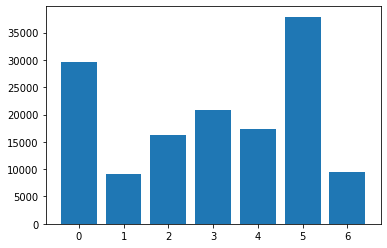

In [ ]:
clustered_SIM_Xafter,clustered_SIM_Yafter = provideKlusteredX(kmeansAlg, simulatedX_train, simulatedY_train)

Accuracy of logistic regression classifier:  0.96
Instance proportion: 21.92982456140351 // Approval rate: 18.0

Accuracy of logistic regression classifier:  0.8809523809523809
Instance proportion: 18.42105263157895 // Approval rate: 100.0

Accuracy of logistic regression classifier:  0.9310344827586207
Instance proportion: 12.719298245614034 // Approval rate: 100.0

Accuracy of logistic regression classifier:  0.5769230769230769
Instance proportion: 11.403508771929825 // Approval rate: 0.0

Accuracy of logistic regression classifier:  0.967741935483871
Instance proportion: 13.596491228070175 // Approval rate: 25.806451612903224

Accuracy of logistic regression classifier:  0.5
Instance proportion: 7.894736842105263 // Approval rate: 27.77777777777778

Accuracy of logistic regression classifier:  0.78125
Instance proportion: 14.035087719298245 // Approval rate: 53.125



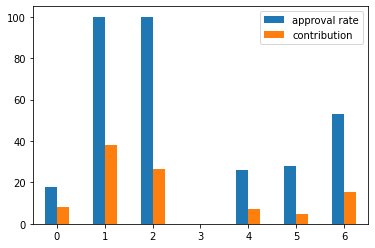

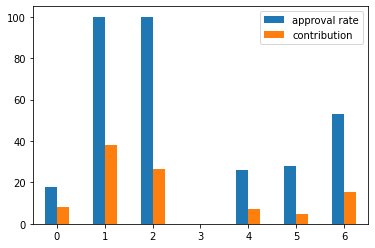

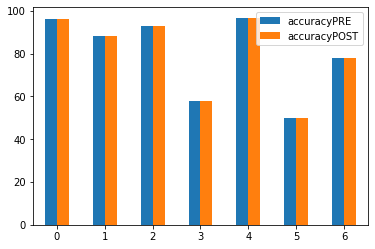

In [ ]:
df = pd.DataFrame({'approval rate': approvalrateTESTpred,
                   'contribution': approvalcontributionrateTESTpred}, index=range(k))
ax = df.plot.bar(rot=0)

presencerateTESTSIM,approvalrateTESTSIM,approvalcontributionrateTESTSIM, accuracyperKTESTSIM = StatsOnKlusteredTestLogRegResults(BatchLogreg,inputX,clustered_testX,clustered_testY)
df = pd.DataFrame({'approval rate': approvalrateTESTSIM,
                   'contribution': approvalcontributionrateTESTSIM,}, index=range(k))
ax = df.plot.bar(rot=0)

df = pd.DataFrame({'accuracyPRE': accuracyperK,
                   'accuracyPOST': accuracyperKTESTSIM}, index=range(k))
ax = df.plot.bar(rot=0)

In [ ]:
simulatedpeopleN = len(X_test)
dicPeople = {}
"""
for i in range(simulatedpeopleN):
  properties_i = {"ID":i,"Happiness":0,"Money":random.randint(0,1000),"NeedofMoney":random.randint(1,1000)}
  properties_i['Happiness'] = 100 * properties_i['Money'] / properties_i['NeedofMoney']
  dicPeople[i] = properties_i
print([item["Happiness"] for item in dicPeople.values() if item["Happiness"]>50])
"""
class Person():
  def __init__(self,i,b,p,n):
        self.id = i
        self.balance = b
        self.petition = p
        self.need = n
        self.happiness = 100*self.balance/max(1,self.need)
        self.status = 0.0
  def updateH(self):
    self.happiness = 100*self.balance/self.need
    return self.happiness

for i in range(simulatedpeopleN):
  p = Person(i,random.randint(0,1000),random.randint(1,1000),random.randint(1,1000))
  dicPeople[i] = p
print(len(dicPeople.keys()))

228


In [ ]:
print([(item.id,item.happiness) for item in dicPeople.values() if item.happiness<50])

[(11, 2.4870466321243523), (14, 24.833333333333332), (17, 7.724867724867725), (24, 38.640132669983416), (31, 18.75), (38, 26.750861079219288), (46, 35.33653846153846), (48, 8.307045215562566), (51, 18.703703703703702), (53, 47.30728616684266), (56, 48.1203007518797), (57, 8.0), (61, 9.295774647887324), (62, 43.83358098068351), (65, 11.380145278450364), (68, 43.26145552560647), (76, 14.322250639386189), (80, 47.22564734895191), (91, 7.645631067961165), (97, 36.58536585365854), (99, 7.4277854195323245), (102, 13.333333333333334), (105, 34.78260869565217), (106, 24.182242990654206), (107, 19.51983298538622), (108, 15.511551155115512), (112, 36.37770897832817), (122, 42.89985052316891), (125, 21.29277566539924), (126, 47.961630695443645), (127, 10.502283105022832), (128, 27.485380116959064), (129, 17.047451669595784), (135, 47.08994708994709), (136, 11.14864864864865), (147, 32.23270440251572), (158, 9.877913429522753), (164, 7.423580786026201), (168, 6.826347305389222), (173, 21.011235955

In [ ]:
print([(item.id,item.happiness) for item in dicPeople.values() if item.happiness>50])

[(0, 243.5064935064935), (1, 72.5382932166302), (2, 350.0), (3, 214.96062992125985), (4, 141.90140845070422), (5, 16275.0), (6, 142.58241758241758), (7, 119.94949494949495), (8, 236.31578947368422), (9, 68.01385681293303), (10, 178.45036319612592), (12, 82.67326732673267), (13, 57.45967741935484), (15, 70.63253012048193), (16, 60.48109965635739), (18, 109.56937799043062), (19, 74.02135231316726), (20, 279.6680497925311), (21, 178.4431137724551), (22, 107.11825487944891), (23, 827.0833333333334), (25, 56.06694560669456), (26, 125.6020278833967), (27, 414.54545454545456), (28, 309.5057034220532), (29, 210.26315789473685), (30, 113.37448559670781), (32, 117.79661016949153), (33, 173.44398340248964), (34, 94.40639269406392), (35, 85.51042810098792), (36, 183.125), (37, 867.5), (39, 108.00450958286359), (40, 1221.7391304347825), (41, 706.1855670103092), (42, 133.23262839879155), (43, 1555.0), (44, 53.101736972704714), (45, 53.84615384615385), (47, 89.84848484848484), (49, 82.72980501392757)

In [ ]:
print(sum([(item.happiness) for item in dicPeople.values()]))
dicPeople[0].balance-=100
dicPeople[0].updateH()
print(sum([(item.happiness) for item in dicPeople.values()]))

65242.43464993139
65177.49958499633


In [ ]:
class peopleDataBatch:
  def __init__(self,i,d):
        self.id = i
        self.data = d
        self.size = len(d)

databatches=[]
b_size = 100
for p in range(0,len(X_test),b_size):
  databatches.append(peopleDataBatch(p,X_test[p:p+b_size]))
first = databatches[0]

In [ ]:
class Bank():
  def __init__(self,m,c,d):
    self.model = m
    self.money = c
    self.clientSatisfaction = 0
    self.dic = d

  def processClientBatch(self, clientBatch):
    original_weights = self.model.coef_
    original_money = self.money
    best_weights = 0
    aux_satisfaction = 0
    for i in range(5):
      assessment = self.model.predict(clientBatch.data)
      curr_satisfaction = self.checkBatchH(clientBatch,assessment) #clientBatch's happiness is checked, and sufficient remaining funds in the bank as well
      print(curr_satisfaction)
      if curr_satisfaction > aux_satisfaction:
        aux_satisfaction=curr_satisfaction
        best_weights = self.model.coef_
      self.model.coef_ = original_weights+np.random.sample([len(self.model.coef_),])*0.25
    self.model.coef_ = best_weights
    final_assessment = self.model.predict(clientBatch.data)
    self.clientSatisfaction = self.serveBatch(clientBatch, final_assessment)
    print(self.clientSatisfaction)
    
  def checkBatchH(self, clientBatch, approvalList):
    auxmoney = self.money
    auxH = 0.0
    gl_i = clientBatch.id
    for p in range(clientBatch.size):
      if approvalList[p] == 1.0:
        #self.dic[gl_i].balance += self.dic[gl_i].petition
        if auxmoney - self.dic[gl_i].petition > 0:
          auxmoney -= self.dic[gl_i].petition
      auxH += self.dic[gl_i].updateH()
      gl_i += 1
    return auxH

  def serveBatch(self, clientBatch, approvalList):
    auxH = 0.0
    gl_i = clientBatch.id
    for p in range(clientBatch.size):
      if approvalList[p] == 1.0:
        self.dic[gl_i].balance += self.dic[gl_i].petition
        self.dic[gl_i].status = 1.0
        self.money -= self.dic[gl_i].petition
      else:
        self.dic[gl_i].status = -1.0
      auxH += self.dic[gl_i].updateH()
      gl_i += 1
    return auxH

bank = Bank(BatchLogreg,10**6,dicPeople)

In [ ]:
for b in databatches:
  bank.processClientBatch(b)

36216.92202082388
36216.92202082388
36216.92202082388
36216.92202082388
36216.92202082388
36216.92202082388
17503.902208693562
17503.902208693562
17503.902208693562
17503.902208693562
17503.902208693562
17602.749853892867
11456.675355478897
11456.675355478897
11456.675355478897
11456.675355478897
11456.675355478897
11456.675355478897


In [ ]:
print([(item.status) for item in bank.dic.values() if item.status<0.0])
print([(item.status) for item in bank.dic.values() if item.status==0.0])
print([(item.status) for item in bank.dic.values() if item.status>0.0])

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.

In [ ]:
print([(item.status) for item in dicPeople.values() if item.status<0.0])
print([(item.status) for item in dicPeople.values() if item.status==0.0])
print([(item.status) for item in dicPeople.values() if item.status>0.0])

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.